In [1]:
from madigan.environments import make_env
from madigan.utils.preprocessor import StackerDiscrete
from madigan.utils.config import make_config
from madigan.environments.cpp import HDFSourceSingle
from madigan.utils.data import State

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# config_hdf = make_config("HDF",
#                         data_source_type="HDFSourceSingle",
#                         data_source_config=dict(filepath="/media/hemu/Data/Markets/Crypto/CME/brti_rolled.hdf5",
#                                                 group_key="15min",
#                                                 price_key="price",
#                                                 feature_key="features",
#                                                 timestamp_key="timestamps",
#                                                 cache_size=1000000,
#                                                 start_time='2017-04-07',
#                                                 end_time='2020-01-01'
#                                                 )
#                         )

config_hdf = make_config("HDF",
                        data_source_type="HDFSourceSingle",
                        data_source_config=dict(filepath="/media/hemu/Data/Markets/FX/nzdjpy.hdf5",
                                                group_key="hl_sampled_15min_1day",
                                                price_key="price",
                                                feature_key="features",
                                                timestamp_key="timestamps",
                                                cache_size=70000,
                                                start_time='2012-01-03',
                                                end_time='2017-01-01'
#                                                 end_time='2018-04-30 23:54:00'
                                                )
                        )
                
env_hdf = make_env(config_hdf)

## Manual Test

In [3]:
filepath="/media/hemu/Data/Markets/FX/nzdjpy.hdf5"
group_key="hl_sampled_15min_1day"
price_key="price"
feature_key="features"
timestamp_key="timestamps"
cache_size=70000
start_time = pd.to_datetime("2012-01-03").value
end_time = pd.to_datetime("2017-01-01").value

datasource = HDFSourceSingle(filepath, group_key, price_key, feature_key,
                             timestamp_key, cache_size, start_time,
                             end_time)
datasource.getData()

array([6.00895000e+01, 6.00665000e+01, 5.97975000e+01, 6.00895000e+01,
       6.01420000e+01, 6.00455000e+01, 5.94780000e+01, 6.00748929e+01,
       5.98750441e+01, 2.57981835e-04, 2.75802480e-03, 3.50796933e-08,
       2.57666280e-07, 9.02265631e-08, 3.42564685e-07])

In [13]:
for i in range(datasource.size-3):
    srdi = env_hdf.step()
    
    if datasource.dataEnd():
        print('end from source')
        assert(datasource.currentCacheIdx == datasource.currentCacheSize-1)
        print(datasource.currentCacheIdx, datasource.currentCacheSize)
        print(datasource.currentIdx, datasource.boundsIdx)
        print(datasource.currentIdx-datasource.boundsIdx[0])
        
datasource.getData(), datasource.currentPrices(), datasource.currentTime

(array([6.02270000e+01, 6.01825000e+01, 5.98460000e+01, 6.02270000e+01,
        6.02270000e+01, 6.01740000e+01, 5.94780000e+01, 6.02079667e+01,
        5.99372815e+01, 7.80685548e-04, 5.61121047e-03, 7.24458747e-08,
        5.77597701e-07, 1.24815004e-07, 6.33590821e-07]),
 array([60.227]),
 1325566620000000000)

In [62]:
for i in range(datasource.size-3):
    datasource.getData()
    if datasource.dataEnd():
        print('end from source')
        assert(datasource.currentCacheIdx == datasource.currentCacheSize)
        print(datasource.currentCacheIdx, datasource.currentCacheSize)
        print(datasource.currentIdx, datasource.boundsIdx)
        print(datasource.currentIdx-datasource.boundsIdx[0])
        
datasource.getData(), datasource.currentPrices(), datasource.currentTime


end from source
55536 55536
55579 (43, 55579)
55536


(array([ 8.09125000e+01,  8.09745000e+01,  8.10955000e+01,  8.09865000e+01,
         8.11865000e+01,  8.09125000e+01,  8.06885000e+01,  8.09468333e+01,
         8.09749535e+01, -7.53616778e-04, -2.20982288e-03,  3.97984107e-08,
         1.71518433e-07,  6.66345873e-08,  6.70530733e-07]),
 array([80.9125]),
 1483036980000000000)

In [29]:
print(datasource.getData())
datasource.currentPrices()

[6.00895000e+01 6.00665000e+01 5.97975000e+01 6.00895000e+01
 6.01420000e+01 6.00455000e+01 5.94780000e+01 6.00748929e+01
 5.98750441e+01 2.57981835e-04 2.75802480e-03 3.50796933e-08
 2.57666280e-07 9.02265631e-08 3.42564685e-07]


array([60.0895])

In [30]:
print(datasource.nFeats, datasource.size, datasource.boundsIdx, datasource.boundsIdx[1] - datasource.boundsIdx[0])
print('current cache size', datasource.currentCacheSize)
print('current idx', datasource.currentIdx, 'current cache idx', datasource.currentCacheIdx)

15 55537 (43, 55579) 55536
current cache size 55537
current idx 44 current cache idx 1


In [31]:
env_hdf.step()
env_hdf.step(np.array([1200]))

(<madigan.environments.cpp.build.env.State at 0x7f2c0bf721f0>,
 -0.00011640000013134179,
 False,
 <madigan.environments.cpp.build.env.EnvInfoMulti at 0x7f2c0bf72130>)

## SubClass

In [38]:
# window_hdf.reset_state()
# class EnvHDF:
#     def __init__(self, dsource):
#         self.dsource = dsource
#     def step(self):
#         return State(self.dsource.getData(), 1, self.dsource.currentTime), 0., 1, 1
# env_hdf = EnvHDF(datasource)

# Viz

In [14]:
window_hdf = StackerDiscrete(12800, env_hdf.nAssets, norm=False)
window_hdf.initialize_history(env_hdf)
dsource = env_hdf.dataSource

25601 25644 55537 55537


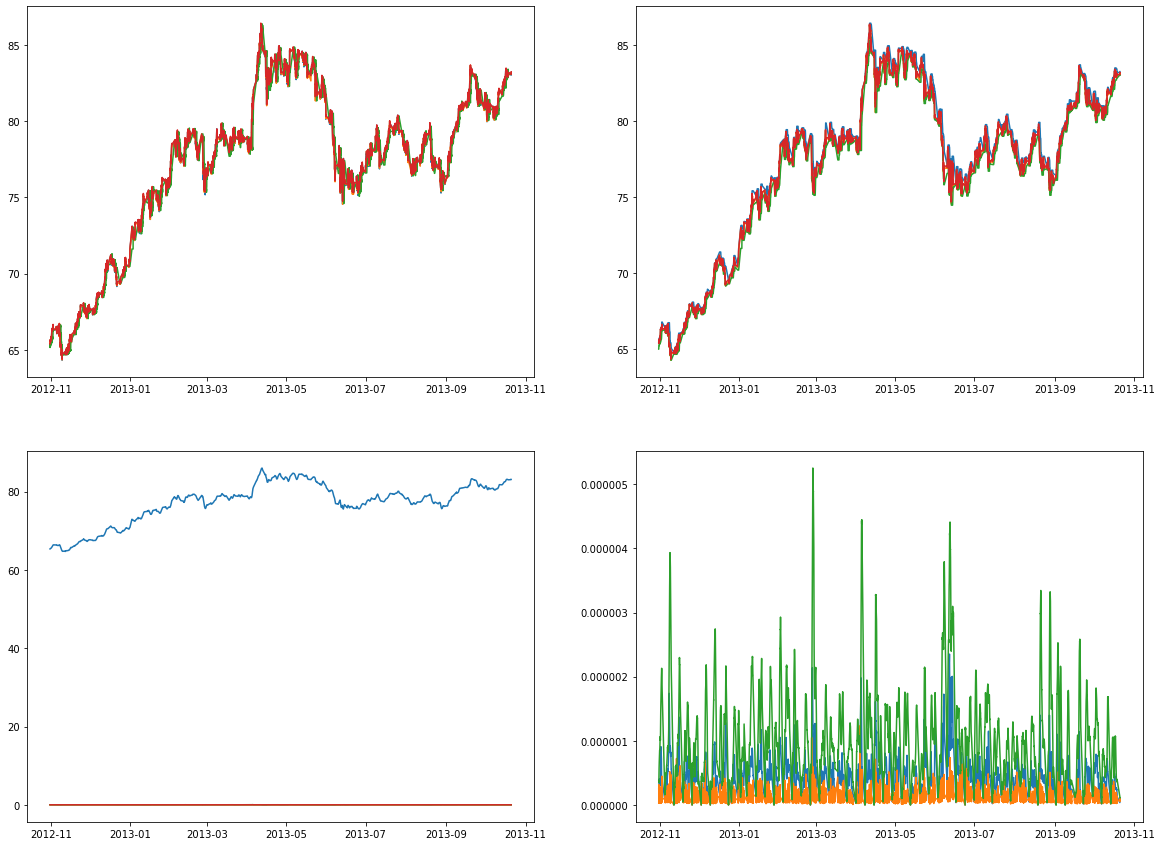

In [15]:
# window_trend_ou.reset_state()
# window_trend_ou.initialize_history(env_trend_ou)
for i in range(12800):
    window_hdf.stream(env_hdf.step())
print(dsource.currentCacheIdx, dsource.currentIdx, dsource.currentCacheSize, dsource.size)
    
fig, ax = plt.subplots(2, 2, figsize=(20, 15))
# ax[0].plot(window_trend_ou.current_data().price, label='trend_ou')
# ax[0].legend()
_ax = ax.flatten()
for i in range(len(_ax)):
    _ax[i].plot(pd.to_datetime(window_hdf.current_data().timestamp), 
                window_hdf.current_data().price[:, i*4: (i+1)*4])
    # ax.plot(pd.to_datetime(window_hdf.current_data().timestamp), env_hdf.current_data().price[:, :4]) 
#     _ax.legend()

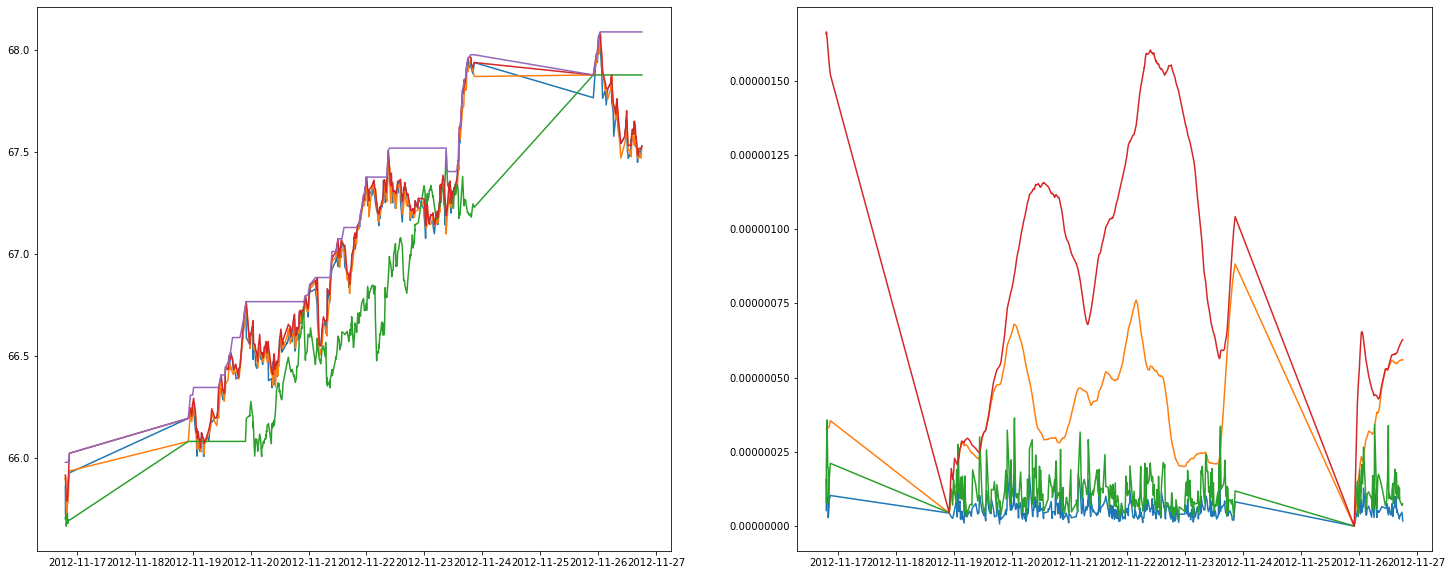

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(25, 10))
idx = slice(None, None)
start = 1000
span = 500
idx = slice(start, start+span)
ax[0].plot(pd.to_datetime(window_hdf.current_data().timestamp[idx]), window_hdf.current_data().price[idx, [0, 1, 2, 3, 4]])
ax[1].plot(pd.to_datetime(window_hdf.current_data().timestamp[idx]), window_hdf.current_data().price[idx, [11, 12, 13, 14]])